In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
import cv2

In [2]:
%pwd

'/Users/nielspace/Documents/Neural_Network_Practice'

In [3]:
train_dir = "/Users/nielspace/Documents/OpenCv_fruit_recog/Fruits/Train"
test_dir = "/Users/nielspace/Documents/OpenCv_fruit_recog/Fruits/Test"
Valid_dir = "/Users/nielspace/Documents/OpenCv_fruit_recog/Fruits/Valid"

In [4]:
batch_size = 50

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_data = train_datagen.flow_from_directory(train_dir,
                                                 batch_size=batch_size, 
                                                 target_size=(150,150),
                                                 class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir, batch_size=batch_size,
                                            target_size=(50,50),
                                            class_mode = "categorical")

Found 2608 images belonging to 6 classes.
Found 163 images belonging to 6 classes.


In [7]:
import pandas as pd

training_df = pd.DataFrame(training_data.classes, columns=['classes'])
test_df = pd.DataFrame(test_data.classes, columns=['classes'])

In [8]:
print(list(training_data.class_indices.keys()))
print(list(test_data.class_indices.keys()))

['Apples', 'Banana', 'Cherry', 'Hazzlenut', 'Lemon', 'Mango']
['Apples', 'Banana', 'Cherry', 'Hazzlenut', 'Lemon', 'Mango']


In [9]:
TRAIN_DATA_DIR = '/Users/nielspace/Documents/OpenCv_fruit_recog/Fruits/Train'
TEST_DATA_DIR = '/Users/nielspace/Documents/OpenCv_fruit_recog/Fruits/Test'
CATEGORIES = ['Apples', 'Banana', 'Cherry', 'Hazzlenut', 'Lemon', 'Mango']

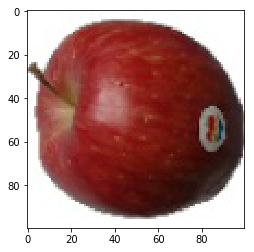

In [10]:
for category in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, category)
    for img in os.listdir(path):
        img_array = load_img(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break


In [11]:
path

'/Users/nielspace/Documents/OpenCv_fruit_recog/Fruits/Train/Apples'

In [12]:
os.listdir(path)

['r_236_100.jpg',
 '247_100.jpg',
 'r_226_100.jpg',
 '257_100.jpg',
 'r_150_100.jpg',
 '121_100.jpg',
 'r_140_100.jpg',
 '131_100.jpg',
 '198_100.jpg',
 '188_100.jpg',
 'r_132_100.jpg',
 '143_100.jpg',
 'r_122_100.jpg',
 '153_100.jpg',
 'r_254_100.jpg',
 '225_100.jpg',
 'r_244_100.jpg',
 '235_100.jpg',
 '300_100.jpg',
 'r_209_100.jpg',
 '278_100.jpg',
 'r_219_100.jpg',
 '310_100.jpg',
 '268_100.jpg',
 'r_313_100.jpg',
 'r_303_100.jpg',
 '285_100.jpg',
 '295_100.jpg',
 'r_192_100.jpg',
 'r_182_100.jpg',
 'r_149_100.jpg',
 '138_100.jpg',
 'r_159_100.jpg',
 '128_100.jpg',
 '181_100.jpg',
 '191_100.jpg',
 'r_296_100.jpg',
 'r_286_100.jpg',
 'r_272_100.jpg',
 '203_100.jpg',
 'r_262_100.jpg',
 '213_100.jpg',
 'r_114_100.jpg',
 '165_100.jpg',
 'r_104_100.jpg',
 '175_100.jpg',
 'r_176_100.jpg',
 '107_100.jpg',
 'r_166_100.jpg',
 '117_100.jpg',
 'r_210_100.jpg',
 '261_100.jpg',
 '309_100.jpg',
 'r_200_100.jpg',
 '271_100.jpg',
 '294_100.jpg',
 '284_100.jpg',
 'r_183_100.jpg',
 'r_193_100.jpg',


new_array = cv2.resize(img_array, (150,150))
plt.imshow(new_array, cmap='gray')
plt.show()

In [13]:
train_data = []

for category in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, category)
    class_index = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = load_img(os.path.join(path, img))
            new_array = img_to_array(img_array)
            new_array = new_array.reshape((1,) + new_array.shape)
            train_data.append([new_array, class_index])
        except Exception as e:
            pass
        

In [14]:
new_array.shape

(1, 100, 100, 3)

In [15]:
import random 
random.shuffle(train_data)

for sample in train_data[:10]:
    print(sample[1])

5
0
4
3
2
3
4
4
4
4


In [16]:
X = []
y = []

for features, label in train_data:
    X.append(features)
    y.append(label)
    

In [17]:
type(train_data)

list

In [18]:
type(X)

list

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Activation, Conv2D, BatchNormalization


In [20]:
X=np.array(X)
X=X/255.0

In [21]:
X.shape

(2608, 1, 100, 100, 3)

In [22]:
X = np.squeeze(X, axis=1)

In [29]:
model = Sequential()
model.add(Conv2D(64, (4, 4), input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())

model.add(Conv2D(64, (4, 4)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(32, (2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

In [30]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 97, 97, 64)        3136      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        65600     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 32)          8224      
__________

from tensorflow.keras.callbacks import TensorBoard
import time
Name = "Fruit_classification_64X2-{}".format(int(time.time()))
tensor_board = TensorBoard(log_dir='logs/Fruit_classification_64X2-1550739521/{}'.format(Name))

In [32]:
model.fit(X,y,batch_size=20,validation_split=0.3,epochs=10)

Train on 1825 samples, validate on 783 samples
Epoch 1/10
1825/1825 [==============================] - 42s 23ms/sample - loss: 1.0573 - acc: 0.6110 - val_loss: 1.4924 - val_acc: 0.4764
Epoch 2/10
1825/1825 [==============================] - 40s 22ms/sample - loss: 0.4642 - acc: 0.8718 - val_loss: 1.1011 - val_acc: 0.8148
Epoch 3/10
1825/1825 [==============================] - 40s 22ms/sample - loss: 0.3139 - acc: 0.9151 - val_loss: 0.5815 - val_acc: 0.8736
Epoch 4/10
1825/1825 [==============================] - 40s 22ms/sample - loss: 0.2485 - acc: 0.9353 - val_loss: 0.2893 - val_acc: 0.9106
Epoch 5/10
1825/1825 [==============================] - 37s 20ms/sample - loss: 0.1968 - acc: 0.9441 - val_loss: 0.0174 - val_acc: 1.0000
Epoch 6/10
1825/1825 [==============================] - 37s 20ms/sample - loss: 0.1730 - acc: 0.9545 - val_loss: 0.0241 - val_acc: 0.9949
Epoch 7/10
1825/1825 [==============================] - 38s 21ms/sample - loss: 0.1680 - acc: 0.9468 - val_loss: 1.1539 - val

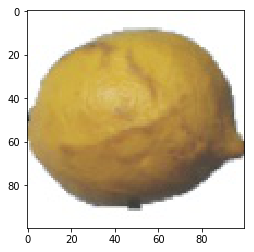

The type predicted is: Lemon


In [34]:
type_1 = load_img('/Users/nielspace/Documents/OpenCv_fruit_recog/Fruits/Test/Lemon/r_39_100.jpg',
                                      target_size=(100, 100))

plt.imshow(type_1, cmap='gray')
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)

predictions = model.predict(type_1_X)

print('The type predicted is: {}'.format(CATEGORIES[np.argmax(predictions)]))


In [36]:
model.save_weights("Fruits_Pred_wts.h5")